In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('train.csv')
datatest=pd.read_csv('test.csv')

In [303]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [237]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [249]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


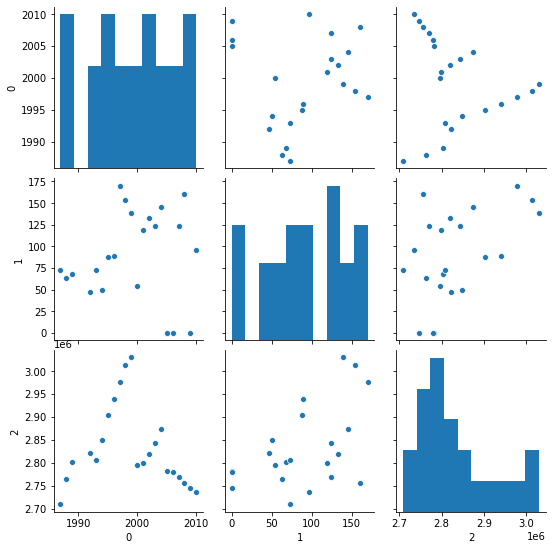

In [0]:
from sklearn.model_selection import train_test_split

In [284]:
X=data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']].values
y=data['price_range'].values
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
ytest

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler()


In [287]:
scaler.fit(xtrain)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
xtrain=scaler.transform(xtrain)
scaler.fit(xtest)
xtest=scaler.transform(xtest)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [0]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [291]:
model.fit(xtrain,ytrain,epochs=150)

Epoch 1/150
50/50 [==============================] - 0s 1ms/step - loss: 2.3725
Epoch 2/150
50/50 [==============================] - 0s 1ms/step - loss: 1.3037
Epoch 3/150
50/50 [==============================] - 0s 1ms/step - loss: 1.1740
Epoch 4/150
50/50 [==============================] - 0s 1ms/step - loss: 1.1289
Epoch 5/150
50/50 [==============================] - 0s 1ms/step - loss: 1.0763
Epoch 6/150
50/50 [==============================] - 0s 1ms/step - loss: 1.0150
Epoch 7/150
50/50 [==============================] - 0s 1ms/step - loss: 0.9521
Epoch 8/150
50/50 [==============================] - 0s 1ms/step - loss: 0.8768
Epoch 9/150
50/50 [==============================] - 0s 1ms/step - loss: 0.7943
Epoch 10/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6981
Epoch 11/150
50/50 [==============================] - 0s 1ms/step - loss: 0.5972
Epoch 12/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4925
Epoch 13/150
50/50 [=================

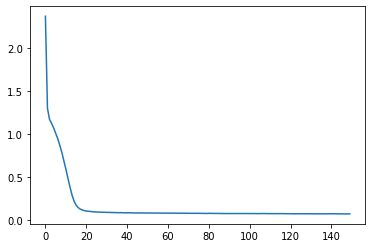

In [292]:
loss=model.history.history['loss']
plt.plot(loss)

In [0]:
testpred=model.predict(xtest)

In [294]:
testpred


array([[ 5.08043319e-02],
       [ 1.81662142e+00],
       [ 8.56281519e-01],
       [ 3.00356984e+00],
       [ 1.37597549e+00],
       [ 1.36588621e+00],
       [ 1.71196079e+00],
       [ 4.68242988e-02],
       [ 2.52912331e+00],
       [ 1.39851284e+00],
       [ 8.28703567e-02],
       [ 4.91554201e-01],
       [ 1.93854594e+00],
       [ 2.91635180e+00],
       [ 2.41644597e+00],
       [ 2.20205212e+00],
       [ 2.98478961e+00],
       [ 3.32686591e+00],
       [ 1.16287112e+00],
       [ 2.94642970e-02],
       [ 2.51962543e-02],
       [ 1.65192032e+00],
       [ 7.20662177e-01],
       [ 1.93832695e+00],
       [ 2.18772069e-02],
       [ 1.00277531e+00],
       [ 2.46367192e+00],
       [ 2.31507087e+00],
       [ 2.21426630e+00],
       [-2.90655494e-02],
       [ 1.54192492e-01],
       [-5.35794348e-02],
       [ 2.85468984e+00],
       [ 7.02025741e-02],
       [ 1.47142100e+00],
       [ 1.29145002e+00],
       [ 2.34044480e+00],
       [ 6.54684156e-02],
       [ 3.2

In [0]:
predf1=pd.DataFrame(ytest,columns=['test'])

In [296]:
predf1

,test
0,0
1,2
2,1
3,3
4,1
...,...
395,3
396,2
397,1
398,1


In [297]:
test_predictions

0      0.033782
1      1.797901
2      0.752855
3      2.981414
4      1.314698
         ...   
395    2.989256
396    1.620207
397    1.342544
398    1.155263
399    2.082354
Length: 400, dtype: float32

In [0]:
testpred=pd.Series(testpred.reshape(400,))
predf1 = pd.concat([predf1,testpred],axis=1)

In [304]:
predf1.columns=["actual","predicted"]
predf1.head(20)

,actual,predicted
0,0,0.050804
1,2,1.816621
2,1,0.856282
3,3,3.003570
4,1,1.375975
5,1,1.365886
6,2,1.711961
7,0,0.046824
8,3,2.529123
9,1,1.398513
